# EM Algorithm - Univariate Gaussian Mixture Model 

In [1]:
import numpy as np
from tqdm import tqdm 
import matplotlib.pyplot as plt

Probability Density Function of Gaussian

In [2]:
def pdf(x, mu, sigma):
    numerator = np.exp((-0.5) * np.square( (x - mu)/sigma ))
    denominator = np.sqrt(2*np.pi)*sigma
    return (numerator/denominator)

## Estimating 2 Component GMM



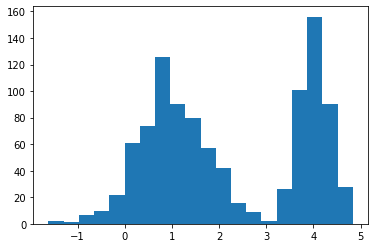

In [3]:
N = 1000
K = 2
mu_1, sigma_1 = 1, 0.7670192403518237
mu_2, sigma_2 = 4, 0.2979386319204766

mus = [mu_1, mu_2]
sigmas = [sigma_1, sigma_2]
priors = [0.6, 0.4]

X1 = np.random.normal(loc=mu_1, scale=sigma_1, size=int(priors[0]*N))
X2 = np.random.normal(loc=mu_2, scale=sigma_2, size=int(priors[1]*N))
X = np.hstack((X1, X2))
plt.hist(X, bins=20)
plt.show()

Random Initialization

In [4]:
lambdas = np.ones((K))/K
means = np.random.choice(X, K)
variances = np.ones((K))/K
variances = np.random.random_sample(size=K)
means, variances, lambdas

(array([3.65424315, 0.55268654]),
 array([0.65034907, 0.35213367]),
 array([0.5, 0.5]))

Iterate till convergence

In [19]:
ll_history = []
for iteration in range(100):
    G = np.zeros((K, N)) #Gamma

    #E-Step
    for k in range(K):
        G[k, :] = pdf(X, means[k], np.sqrt(variances[k])) * lambdas[k]
    ll_history.append(G.sum(axis=0)[0])
    G = G / np.sum(G, axis=0)
    
  
    #M-Step
    means = np.matmul(G, X)
    means /= np.sum(G, axis=1)
    means += 1e-18
    print(means.shape)

    for k in range(K):
        variances[k] = np.matmul(G[k], np.square(X-means[k]))
        variances[k] /= (np.sum(G[k]))
        lambdas[k] = np.mean(G[k])
    
    print(f'Iteration {iteration}: \nmeans - {means}, \nvariances - {variances}, \nlambdas = {lambdas}\n')

(2,)
Iteration 0: 
means - [4.01743509 1.00084298], 
variances - [0.09732297 0.55239293], 
lambdas = [0.40144769 0.59855231]

(2,)
Iteration 1: 
means - [4.01743509 1.00084298], 
variances - [0.09732297 0.55239293], 
lambdas = [0.40144769 0.59855231]

(2,)
Iteration 2: 
means - [4.01743509 1.00084298], 
variances - [0.09732297 0.55239293], 
lambdas = [0.40144769 0.59855231]

(2,)
Iteration 3: 
means - [4.01743509 1.00084298], 
variances - [0.09732297 0.55239293], 
lambdas = [0.40144769 0.59855231]

(2,)
Iteration 4: 
means - [4.01743509 1.00084298], 
variances - [0.09732297 0.55239293], 
lambdas = [0.40144769 0.59855231]

(2,)
Iteration 5: 
means - [4.01743509 1.00084298], 
variances - [0.09732297 0.55239293], 
lambdas = [0.40144769 0.59855231]

(2,)
Iteration 6: 
means - [4.01743509 1.00084298], 
variances - [0.09732297 0.55239293], 
lambdas = [0.40144769 0.59855231]

(2,)
Iteration 7: 
means - [4.01743509 1.00084298], 
variances - [0.09732297 0.55239293], 
lambdas = [0.40144769 0.598

In [20]:
print(f'Results: \nmeans - {means}, \nvariances - {variances}, \nlambdas = {lambdas}\n')

Results: 
means - [4.01743509 1.00084298], 
variances - [0.09732297 0.55239293], 
lambdas = [0.40144769 0.59855231]



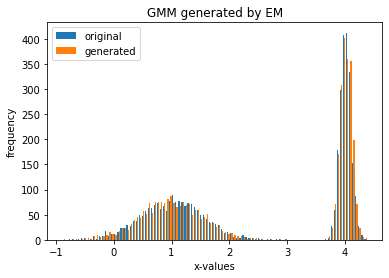

In [21]:
points = []
for k in range(K):
    points.append(np.random.normal(loc=means[k], scale=variances[k], size=2000))
points = np.array(points).reshape(-1, 1)

points2 = []
for k in range(K):
    points2.append(np.random.normal(loc=means[k], scale=variances[k], size=2000))
points2 = np.array(points2).reshape(-1, 1)

points = np.hstack((points, points2))

plt.hist(points, bins=100, label=['original', 'generated'])
plt.legend(prop={'size': 10})
plt.xlabel('x-values')
plt.ylabel('frequency')
plt.title('GMM generated by EM')
plt.show()

## Estimating GMM with 5 Components

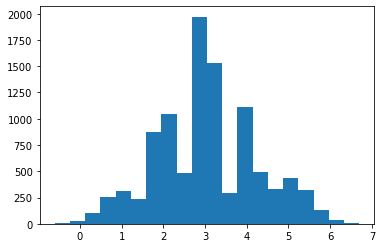

Iteration 0: 
means - [1.82927433 3.95544952 3.06748906 5.02060342 3.56814274], 
variances - [0.55694595 0.04405371 0.54288142 0.40133137 0.64581986], 
lambdas = [0.30697703 0.09578574 0.31621731 0.09469851 0.18632141]

Iteration 1: 
means - [1.88067571 4.00634295 3.00625783 5.08973077 3.48815446], 
variances - [0.6341138  0.03066252 0.44025544 0.29162536 0.70071996], 
lambdas = [0.30123012 0.07269111 0.33579999 0.10670662 0.18357216]

Iteration 2: 
means - [1.8942155  4.02964967 2.97166801 5.10980225 3.44017539], 
variances - [0.68120135 0.02170604 0.37383738 0.24027547 0.72286259], 
lambdas = [0.29649331 0.06953693 0.34354551 0.1130994  0.17732485]

Iteration 3: 
means - [1.89385713 4.03854992 2.94987511 5.11652309 3.40930844], 
variances - [0.70380901 0.01766945 0.32799371 0.2208829  0.74006065], 
lambdas = [0.2930966  0.07330234 0.34645948 0.11632655 0.17081503]

Iteration 4: 
means - [1.88812083 4.04184005 2.9357394  5.11621986 3.3892332 ], 
variances - [0.71038306 0.01597286 0.29

In [23]:
N = 10000
K = 5
mu_1, sigma_1 = 1, 0.459034464689231
mu_2, sigma_2 = 2, 0.207702519428098
mu_3, sigma_3 = 3, 0.23489427229510515
mu_4, sigma_4 = 4, 0.17162219198716364
mu_5, sigma_5 = 5, 0.5122055673069296

mus = [mu_1, mu_2, mu_3, mu_4, mu_5]
sigmas = [sigma_1, sigma_2, sigma_3, sigma_4, sigma_5]
priors = [0.1, 0.2, 0.4, 0.15, 0.15]

X1 = np.random.normal(loc=mu_1, scale=sigma_1, size=int(priors[0]*N))
X2 = np.random.normal(loc=mu_2, scale=sigma_2, size=int(priors[1]*N))
X3 = np.random.normal(loc=mu_3, scale=sigma_3, size=int(priors[2]*N))
X4 = np.random.normal(loc=mu_4, scale=sigma_4, size=int(priors[3]*N))
X5 = np.random.normal(loc=mu_5, scale=sigma_5, size=int(priors[4]*N))
X = np.hstack((X1, X2, X3, X4, X5))
plt.hist(X, bins=20)
plt.show()

lambdas = np.ones((K))/K
means = np.random.choice(X, K)
variances = np.ones((K))/K
variances = np.random.random_sample(size=K)
means, variances, lambdas

ll_hist = []
for iteration in range(150):
    G = np.zeros((K, N)) #Gamma

    #E-Step
    for k in range(K):
        G[k, :] = pdf(X, means[k], np.sqrt(variances[k])) * lambdas[k]
    ll_hist.append(G.sum())
    G = G / np.sum(G, axis=0)

  
    #M-Step
    means = np.matmul(G, X)
    means /= np.sum(G, axis=1)
    means += 1e-18

    for k in range(K):
        variances[k] = np.matmul(G[k], np.square(X-means[k]))
        variances[k] /= (np.sum(G[k]))
        lambdas[k] = np.mean(G[k])
    
    print(f'Iteration {iteration}: \nmeans - {means}, \nvariances - {variances}, \nlambdas = {lambdas}\n')

print(f'Results: \nmeans - {means}, \nvariances - {variances}, \nlambdas = {lambdas}\n')

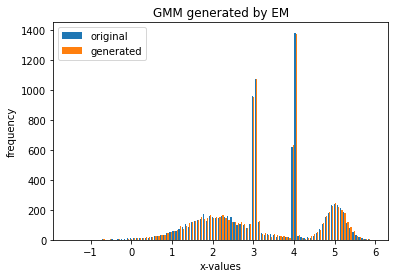

In [24]:
points = []
for k in range(K):
    points.append(np.random.normal(loc=means[k], scale=variances[k], size=2000))
points = np.array(points).reshape(-1, 1)

points2 = []
for k in range(K):
    points2.append(np.random.normal(loc=means[k], scale=variances[k], size=2000))
points2 = np.array(points2).reshape(-1, 1)

points = np.hstack((points, points2))

plt.hist(points, bins=100, label=['original', 'generated'])
plt.legend(prop={'size': 10})
plt.xlabel('x-values')
plt.ylabel('frequency')
plt.title('GMM generated by EM')
plt.show()

In [34]:
import plotly.express as px 
fig = px.line(x=list(range(len(ll_hist))), y=ll_hist)
fig.update_layout(
    title='Likelihood vs time',
    xaxis_title="iteration",
    yaxis_title="likelihood",
)
fig.show()